In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [41]:
df = pd.read_csv('cars-dataset.csv')

In [42]:
df.head()

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150,3433,12.0,70,16.0
4,ford torino,8,302.0,140,3449,10.5,70,17.0


In [43]:
df.shape

(398, 8)

In [44]:
df.dtypes

car name     object
cyl           int64
disp        float64
hp           object
wt            int64
acc         float64
yr            int64
mpg         float64
dtype: object

In [45]:
df.isnull().sum()

car name    0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
mpg         0
dtype: int64

In [46]:
df = df[df.hp != '?']
df.shape

(392, 8)

In [47]:
df['hp'] = df['hp'].astype(float)

In [48]:
df.dtypes

car name     object
cyl           int64
disp        float64
hp          float64
wt            int64
acc         float64
yr            int64
mpg         float64
dtype: object

In [49]:
df.describe()

,cyl,disp,hp,wt,acc,yr,mpg
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,23.445918
std,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,7.805007
min,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,9.000000
25%,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,17.000000
50%,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,22.750000
75%,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,29.000000
max,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,46.600000


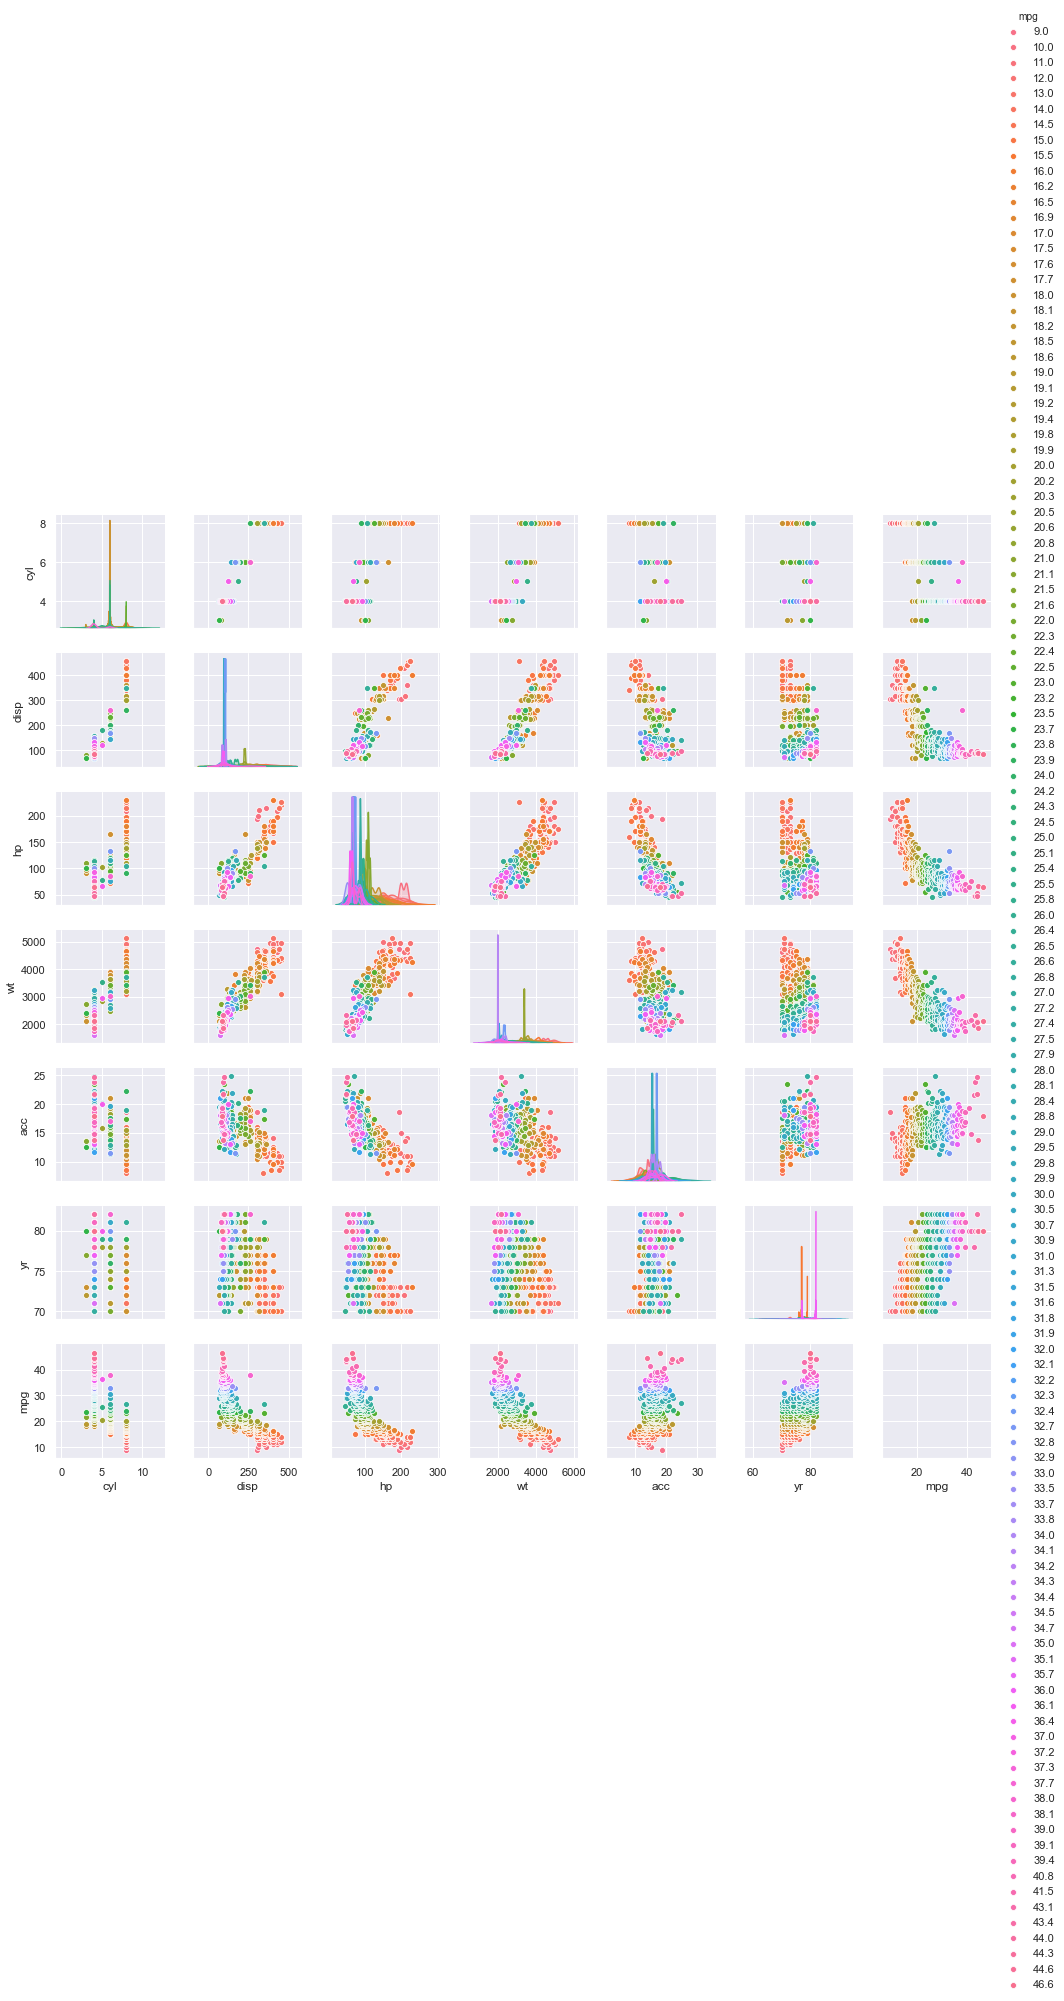

In [13]:
sns.set()
sns.pairplot(df, size = 2.0,hue ='mpg')
plt.show()

In [50]:
df = df.drop(columns='car name')
print(df.columns)

Index(['cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'mpg'], dtype='object')


['cyl' 'disp' 'hp' 'wt' 'acc' 'yr' 'mpg']


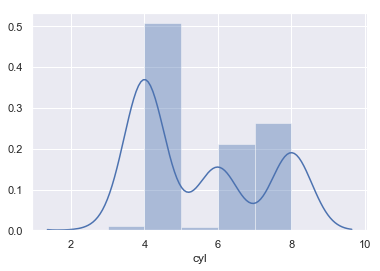

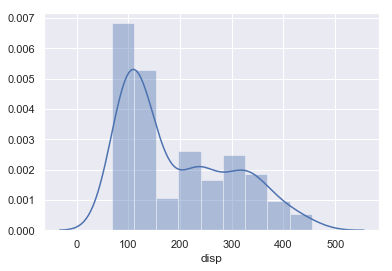

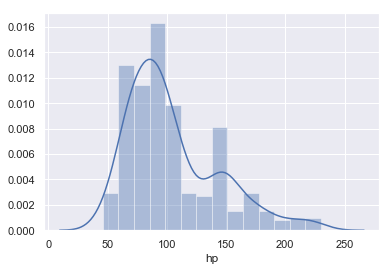

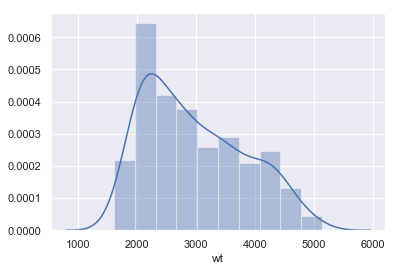

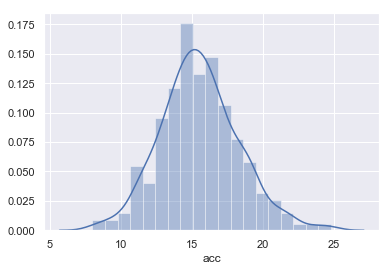

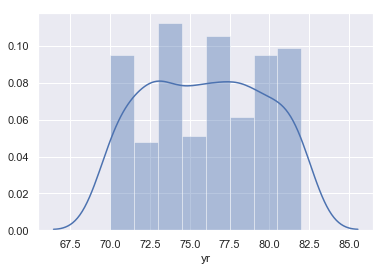

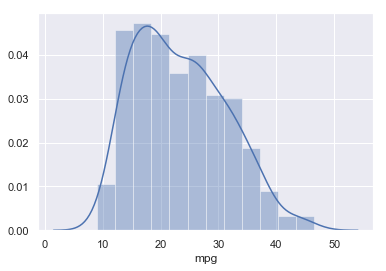

In [51]:
colnames = df.columns.values
print(colnames)
for i in colnames:
    sns.distplot(df[i])
    plt.show()

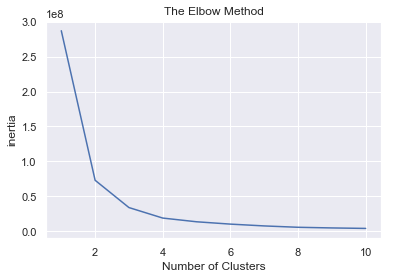

In [52]:
from sklearn.cluster import KMeans

wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init = 'k-means++', max_iter =300, n_init=10, random_state=0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('inertia')
plt.show()

In [53]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
km.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [54]:
centroid = kmeans.cluster_centers_
print(centroid.shape)
print(centroid)

(10, 7)
[[8.00000000e+00 3.85187500e+02 1.79625000e+02 4.79237500e+03
  1.29687500e+01 7.25625000e+01 1.23750000e+01]
 [4.00000000e+00 1.19794118e+02 8.65588235e+01 2.44208824e+03
  1.61176471e+01 7.61764706e+01 2.68500000e+01]
 [7.06060606e+00 2.83909091e+02 1.26090909e+02 3.67006061e+03
  1.51121212e+01 7.53030303e+01 1.73454545e+01]
 [4.00000000e+00 8.79038462e+01 6.36923077e+01 1.91836538e+03
  1.71307692e+01 7.73269231e+01 3.30615385e+01]
 [6.26666667e+00 2.36955556e+02 1.04955556e+02 3.31808889e+03
  1.63377778e+01 7.60222222e+01 1.94555556e+01]
 [8.00000000e+00 3.62032258e+02 1.72000000e+02 4.35593548e+03
  1.26935484e+01 7.32903226e+01 1.41580645e+01]
 [3.98507463e+00 1.02425373e+02 7.72238806e+01 2.18498507e+03
  1.61567164e+01 7.62388060e+01 2.99507463e+01]
 [4.43478261e+00 1.43978261e+02 9.45434783e+01 2.68047826e+03
  1.53978261e+01 7.75217391e+01 2.51130435e+01]
 [7.86206897e+00 3.22310345e+02 1.42862069e+02 4.02686207e+03
  1.39413793e+01 7.48275862e+01 1.53448276e+01]
 [

In [55]:
df['clustersLabels']=km.predict(df)

In [56]:
df.head()

,cyl,disp,hp,wt,acc,yr,mpg,clustersLabels
0,8,307.0,130.0,3504,12.0,70,18.0,2
1,8,350.0,165.0,3693,11.5,70,15.0,0
2,8,318.0,150.0,3436,11.0,70,18.0,2
3,8,304.0,150.0,3433,12.0,70,16.0,2
4,8,302.0,140.0,3449,10.5,70,17.0,2


In [57]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,cyl,disp,hp,wt,acc,yr,mpg,clustersLabels
cyl,1,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.777618,-0.354662
disp,0.950823,1,0.897257,0.932994,-0.5438,-0.369855,-0.805127,-0.375902
hp,0.842983,0.897257,1,0.864538,-0.689196,-0.416361,-0.778427,-0.425571
wt,0.897527,0.932994,0.864538,1,-0.416839,-0.30912,-0.832244,-0.373258
acc,-0.504683,-0.5438,-0.689196,-0.416839,1,0.290316,0.423329,0.292981
yr,-0.345647,-0.369855,-0.416361,-0.30912,0.290316,1,0.580541,0.21124
mpg,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,1,0.209932
clustersLabels,-0.354662,-0.375902,-0.425571,-0.373258,0.292981,0.21124,0.209932,1


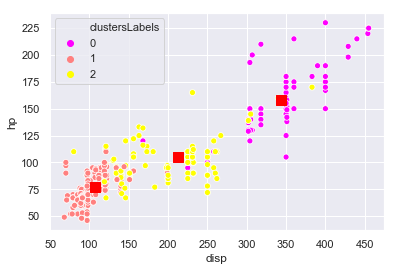

In [58]:
sns.scatterplot(x='disp', y='hp', hue='clustersLabels', data=df, palette='spring')
plt.scatter(km.cluster_centers_[:,1], km.cluster_centers_[:,2], s=100, marker='s', c='red', label='Centroids')

In [59]:
kmeans = KMeans(n_clusters=3)
df["kmeans"] = kmeans.fit_predict(df[df.columns[:7]])

In [66]:
df["cluster1"] = df.kmeans==0
df["cluster2"] = df.kmeans==1
df["cluster3"] = df.kmeans==2
df.head()

,cyl,disp,hp,wt,acc,yr,mpg,clustersLabels,kmeans,cluster1,cluster2,cluster3
0,8,307.0,130.0,3504,12.0,70,18.0,2,2,False,False,True
1,8,350.0,165.0,3693,11.5,70,15.0,0,1,False,True,False
2,8,318.0,150.0,3436,11.0,70,18.0,2,2,False,False,True
3,8,304.0,150.0,3433,12.0,70,16.0,2,2,False,False,True
4,8,302.0,140.0,3449,10.5,70,17.0,2,2,False,False,True


In [90]:
clu1 = df[df['clustersLabels'] == 0]
clu2 = df[df['clustersLabels'] == 1]
clu3 = df[df['clustersLabels'] == 2]

In [91]:
clu1 = clu1.drop(["kmeans", "clustersLabels","cluster1","cluster2","cluster3"], axis=1)
clu2 = clu2.drop(["kmeans", "clustersLabels","cluster1","cluster2","cluster3"], axis=1)
clu3 = clu3.drop(["kmeans", "clustersLabels","cluster1","cluster2","cluster3"], axis=1)


In [92]:
print(clu1.shape)
print(clu2.shape)
print(clu3.shape)

(90, 7)
(180, 7)
(122, 7)


In [93]:
clu1.head()

,cyl,disp,hp,wt,acc,yr,mpg
1,8,350.0,165.0,3693,11.5,70,15.0
5,8,429.0,198.0,4341,10.0,70,15.0
6,8,454.0,220.0,4354,9.0,70,14.0
7,8,440.0,215.0,4312,8.5,70,14.0
8,8,455.0,225.0,4425,10.0,70,14.0


In [94]:
y1 = clu1["mpg"]
clu1 = clu1.drop(["mpg"], axis=1)


In [95]:
y2 = clu2["mpg"]
clu2 = clu2.drop(["mpg"], axis=1)

In [96]:
y3 = clu3["mpg"]
clu3 = clu3.drop(["mpg"], axis=1)

In [97]:
x1_train,x1_test,y1_train,y1_test = train_test_split(clu1,y1,test_size=0.3)
x2_train,x2_test,y2_train,y2_test = train_test_split(clu2,y2,test_size=0.3)
x3_train,x3_test,y3_train,y3_test = train_test_split(clu3,y3,test_size=0.3)

In [98]:
corr = clu1.corr()
corr.style.background_gradient(cmap='coolwarm')

,cyl,disp,hp,wt,acc,yr
cyl,1,0.577707,0.457961,0.322733,-0.566742,-0.0944308
disp,0.577707,1,0.76861,0.553361,-0.77838,-0.349191
hp,0.457961,0.76861,1,0.56608,-0.719314,-0.561141
wt,0.322733,0.553361,0.56608,1,-0.282163,-0.395326
acc,-0.566742,-0.77838,-0.719314,-0.282163,1,0.409199
yr,-0.0944308,-0.349191,-0.561141,-0.395326,0.409199,1


In [99]:
corr = clu2.corr()
corr.style.background_gradient(cmap='coolwarm')

,cyl,disp,hp,wt,acc,yr
cyl,1,0.613667,0.181408,0.208104,-0.101288,-0.145859
disp,0.613667,1,0.573918,0.742342,-0.316452,-0.0610396
hp,0.181408,0.573918,1,0.707825,-0.599671,-0.210435
wt,0.208104,0.742342,0.707825,1,-0.223696,-0.000200526
acc,-0.101288,-0.316452,-0.599671,-0.223696,1,-0.0325824
yr,-0.145859,-0.0610396,-0.210435,-0.000200526,-0.0325824,1


In [100]:
corr = clu3.corr()
corr.style.background_gradient(cmap='coolwarm')

,cyl,disp,hp,wt,acc,yr
cyl,1,0.869285,0.615645,0.595574,-0.50525,-0.385492
disp,0.869285,1,0.628809,0.650994,-0.4443,-0.478106
hp,0.615645,0.628809,1,0.331145,-0.79107,-0.367805
wt,0.595574,0.650994,0.331145,1,-0.0159908,-0.245896
acc,-0.50525,-0.4443,-0.79107,-0.0159908,1,0.400494
yr,-0.385492,-0.478106,-0.367805,-0.245896,0.400494,1


In [101]:
regressor1 = LinearRegression()
regressor1.fit(x1_train,y1_train)
y1_predicted = regressor1.predict(x1_test)
y1_predicted

array([14.11678909, 15.66643747, 15.82718911, 13.38637734, 13.86098494,
       18.74666315, 16.39519412, 13.51362003, 13.30200973, 16.50442338,
       14.20039954, 16.14577827, 18.56349429, 12.85026711, 14.5117074 ,
       17.75717916, 10.40626944, 13.13550387, 15.02407243, 14.53886348,
       16.70838318, 13.53763918, 13.90727347, 18.37106888, 15.63265853,
       16.10626071, 17.96705679])

In [102]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(y_true=y1_test,y_pred=y1_predicted))
rmse

1.6018631171061641

In [103]:
coef1 = regressor1.coef_
coef1

array([-0.90698452,  0.02743454, -0.02436012, -0.00348346,  0.20038582,
        0.43518082])

In [104]:

intr1 = regressor1.intercept_ 
intr1

-3.662515731668856

In [107]:
print(regressor1.score(x1_train, y1_train))
print(regressor1.score(x1_test, y1_test))

0.6909673249393435
0.30019124201497926


In [108]:
#Performing Linear Regression for Cluster2
regressor2 = LinearRegression()
regressor2.fit(x2_train,y2_train)
y2_predicted = regressor2.predict(x2_test)
y2_predicted

array([32.22480119, 33.46055221, 28.63067388, 34.97903355, 36.445868  ,
       23.85084912, 23.03871983, 26.15190012, 21.37342877, 26.26597878,
       23.27756177, 33.0177805 , 22.79976436, 33.2457483 , 19.12142293,
       31.21839644, 35.59029752, 35.02219843, 37.19439066, 28.84662684,
       29.19409159, 21.44391209, 28.78745966, 31.92874631, 32.64632258,
       26.88036378, 30.5430894 , 30.47460401, 32.77053312, 28.83991147,
       23.26353391, 22.81127752, 38.32674857, 32.28119653, 34.53711621,
       26.50774749, 26.54348887, 32.61891511, 23.88098325, 26.8255748 ,
       32.79023198, 33.52660211, 37.02808994, 31.15281646, 29.47847673,
       36.36526212, 26.90737518, 33.73493526, 32.52097346, 24.99792147,
       28.63809964, 24.98152745, 25.6804286 , 28.6571501 ])

In [109]:
rmse = sqrt(mean_squared_error(y_true=y2_test,y_pred=y2_predicted))
rmse

3.2073528513169722

In [110]:
coef2 = regressor1.coef_
coef2

array([-0.90698452,  0.02743454, -0.02436012, -0.00348346,  0.20038582,
        0.43518082])

In [111]:

intr2 = regressor2.intercept_ 
intr2

-26.476356329446567

In [112]:
print(regressor2.score(x2_train, y2_train))
print(regressor2.score(x2_test, y2_test))

0.6833103590737719
0.6548023571327685


In [113]:
#Performing Linear Regression for Cluster3
regressor3 = LinearRegression()
regressor3.fit(x3_train,y3_train)
y3_predicted = regressor3.predict(x3_test)
y3_predicted

array([17.25929881, 24.76195246, 24.59010614, 20.86829458, 24.61567125,
       18.11743701, 23.67619129, 21.97712157, 18.53645744, 23.1929735 ,
       24.68616173, 20.18457376, 17.23355777, 22.37629298, 20.12328657,
       24.65973891, 20.17724238, 21.73172457, 19.4866309 , 21.8815179 ,
       20.13169817, 20.0447763 , 20.25413534, 18.590256  , 13.91061468,
       17.16884708, 20.3626176 , 18.7479774 , 24.05568241, 19.37190593,
       19.86220315, 20.21730042, 17.83713599, 24.10111224, 19.56085257,
       22.37060762, 24.376434  ])

In [114]:
rmse = sqrt(mean_squared_error(y_true=y3_test,y_pred=y3_predicted))
rmse

3.3033751213926426

In [115]:
coef3 = regressor1.coef_
coef3

array([-0.90698452,  0.02743454, -0.02436012, -0.00348346,  0.20038582,
        0.43518082])

In [116]:

intr3 = regressor3.intercept_ 
intr3

-6.593586426509692

In [117]:
print(regressor3.score(x3_train, y3_train))
print(regressor3.score(x3_test, y3_test))

0.6402033253346473
0.45796686005469756
